In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import anndata as ad
import scvelo as scv

In [17]:
flox = ad.read_h5ad("/Volumes/Bud_SSD/20210621-velocyto/flox-aggr.h5ad")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [18]:
flox.obs_names_make_unique()

In [19]:
cellid_flox = pd.read_csv("/Volumes/Bud_SSD/20210621-velocyto/cell-id-mesoderm-flox.csv")
clustanno_flox = pd.read_csv("/Volumes/Bud_SSD/20210621-velocyto/cluster-annotation-mesoderm-flox.csv")
umapcoord_flox = pd.read_csv("/Volumes/Bud_SSD/20210621-velocyto/umap-coord-mesoderm-flox.csv")

In [20]:
flox_mesoderm = flox[np.isin(flox.obs.index, cellid_flox['x'])]

In [21]:
flox_mesoderm

View of AnnData object with n_obs × n_vars = 7936 × 31055
    obs: 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [22]:
flox_mesoderm.obs.index

Index(['AACCGCGGTGTGAATA-1', 'AACGTTGCAATCCAAC-1', 'AAGACCTGTTCGCTAA-1',
       'AACGTTGGTAGCGTCC-1', 'AAGGAGCGTAGATTAG-1', 'AACACGTTCGTTTATC-1',
       'AACCATGAGCGAGAAA-1', 'AAGGCAGCAGGATTGG-1', 'AACTGGTTCGTTGACA-1',
       'AACTCTTCAACGCACC-1',
       ...
       'TTTGTCAAGCAGACTG-5', 'TTTATGCGTATATGAG-5', 'TTTGTCAAGCTAGTTC-5',
       'TTTCCTCCACGTCTCT-5', 'TTTGCGCTCATCGATG-5', 'TTTGGTTTCTGGTGTA-5',
       'TTTATGCTCACTCCTG-5', 'TTTCCTCTCTGGTTCC-5', 'TTTGCGCAGCGTTCCG-5',
       'TTTGCGCTCCAGGGCT-5'],
      dtype='object', name='index', length=7936)

In [23]:
flox_mesoderm_index = pd.DataFrame(flox_mesoderm.obs.index)
flox_mesoderm_index = flox_mesoderm_index.rename(columns = {'index':'Cell ID'})
flox_mesoderm_index

,Cell ID
0,AACCGCGGTGTGAATA-1
1,AACGTTGCAATCCAAC-1
2,AAGACCTGTTCGCTAA-1
3,AACGTTGGTAGCGTCC-1
4,AAGGAGCGTAGATTAG-1
...,...
7931,TTTGGTTTCTGGTGTA-5
7932,TTTATGCTCACTCCTG-5
7933,TTTCCTCTCTGGTTCC-5
7934,TTTGCGCAGCGTTCCG-5


In [24]:
umapcoord_flox = umapcoord_flox.rename(columns = {'Unnamed: 0':'Cell ID'})
umapcoord_flox

,Cell ID,umap.1,umap.2
0,AAACCTGAGCTGAACG-1,0.340236,-5.084733
1,AAACCTGAGTCTCAAC-1,2.042693,0.253092
2,AAACCTGTCCTGCTTG-1,10.667413,8.124449
3,AAACGGGCACTTCTGC-1,-0.714589,-0.764938
4,AAACGGGTCACTTACT-1,5.196884,-1.866705
...,...,...,...
7931,TTTGCGCTCATCGATG-5,-6.731047,-0.043981
7932,TTTGCGCTCCAGGGCT-5,-0.325529,-5.076941
7933,TTTGGTTTCTGGTGTA-5,-1.517803,1.329686
7934,TTTGTCAAGCAGACTG-5,-5.377699,-1.277311


In [25]:
umapcoord_ordered = flox_mesoderm_index.merge(umapcoord_flox, on = 'Cell ID')
umapcoord_ordered

,Cell ID,umap.1,umap.2
0,AACCGCGGTGTGAATA-1,-6.549315,2.379771
1,AACGTTGCAATCCAAC-1,-4.964205,8.346187
2,AAGACCTGTTCGCTAA-1,-6.213035,6.533409
3,AACGTTGGTAGCGTCC-1,6.530745,-3.116401
4,AAGGAGCGTAGATTAG-1,-5.447963,2.286709
...,...,...,...
7931,TTTGGTTTCTGGTGTA-5,-1.517803,1.329686
7932,TTTATGCTCACTCCTG-5,4.948038,-5.380980
7933,TTTCCTCTCTGGTTCC-5,-6.962942,0.289207
7934,TTTGCGCAGCGTTCCG-5,0.479214,-4.286642


In [26]:
umapcoord_ordered = umapcoord_ordered.iloc[:,1:]
umapcoord_ordered

,umap.1,umap.2
0,-6.549315,2.379771
1,-4.964205,8.346187
2,-6.213035,6.533409
3,6.530745,-3.116401
4,-5.447963,2.286709
...,...,...
7931,-1.517803,1.329686
7932,4.948038,-5.380980
7933,-6.962942,0.289207
7934,0.479214,-4.286642


In [27]:
flox_mesoderm.obsm['X_umap'] = umapcoord_ordered.values
flox_mesoderm.obsm['X_umap']

array([[-6.54931521,  2.37977053],
       [-4.96420503,  8.34618713],
       [-6.21303534,  6.53340865],
       ...,
       [-6.96294188,  0.28920658],
       [ 0.47921379, -4.28664158],
       [-0.32552916, -5.07694148]])

In [28]:
clustanno_flox = clustanno_flox.rename(columns = {'Unnamed: 0':'Cell ID'})
clustanno_flox

,Cell ID,x
0,AAACCTGAGCTGAACG-1,SHF
1,AAACCTGAGTCTCAAC-1,MMP
2,AAACCTGTCCTGCTTG-1,PE
3,AAACGGGCACTTCTGC-1,MMP
4,AAACGGGTCACTTACT-1,FHF
...,...,...
7931,TTTGCGCTCATCGATG-5,PMP
7932,TTTGCGCTCCAGGGCT-5,SHF
7933,TTTGGTTTCTGGTGTA-5,MMP
7934,TTTGTCAAGCAGACTG-5,PMP


In [29]:
clustanno_ordered = flox_mesoderm_index.merge(clustanno_flox, on = 'Cell ID')
clustanno_ordered

,Cell ID,x
0,AACCGCGGTGTGAATA-1,PMP
1,AACGTTGCAATCCAAC-1,NMP
2,AAGACCTGTTCGCTAA-1,NMP
3,AACGTTGGTAGCGTCC-1,FHF
4,AAGGAGCGTAGATTAG-1,PMP
...,...,...
7931,TTTGGTTTCTGGTGTA-5,MMP
7932,TTTATGCTCACTCCTG-5,FHF
7933,TTTCCTCTCTGGTTCC-5,PMP
7934,TTTGCGCAGCGTTCCG-5,SHF


In [30]:
clustanno_ordered = clustanno_ordered.iloc[:,1:]
clustanno_ordered

,x
0,PMP
1,NMP
2,NMP
3,FHF
4,PMP
...,...
7931,MMP
7932,FHF
7933,PMP
7934,SHF


In [31]:
flox_mesoderm.obs['clust_anno'] = clustanno_ordered.values
flox_mesoderm.obs['clust_anno']

index
AACCGCGGTGTGAATA-1    PMP
AACGTTGCAATCCAAC-1    NMP
AAGACCTGTTCGCTAA-1    NMP
AACGTTGGTAGCGTCC-1    FHF
AAGGAGCGTAGATTAG-1    PMP
                     ... 
TTTGGTTTCTGGTGTA-5    MMP
TTTATGCTCACTCCTG-5    FHF
TTTCCTCTCTGGTTCC-5    PMP
TTTGCGCAGCGTTCCG-5    SHF
TTTGCGCTCCAGGGCT-5    SHF
Name: clust_anno, Length: 7936, dtype: object

In [32]:
flox_mesoderm

AnnData object with n_obs × n_vars = 7936 × 31055
    obs: 'batch', 'clust_anno'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [33]:
scv.pp.filter_and_normalize(flox_mesoderm)

Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [34]:
scv.pp.moments(flox_mesoderm)

computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [35]:
scv.tl.velocity(flox_mesoderm)

computing velocities
    finished (0:00:19) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [36]:
scv.tl.velocity_graph(flox_mesoderm)

computing velocity graph (using 1/10 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:29) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [37]:
scv.tl.recover_dynamics(flox_mesoderm)

recovering dynamics (using 1/10 cores)
    finished (0:12:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [38]:
flox_mesoderm.obs['clust_anno'] = flox_mesoderm.obs['clust_anno'].cat.reorder_categories(["NMP", "MMP", "FHF", "SHF", "PMP", "PSM", "HMB", "PE", "PGC"], ordered = True)
flox_mesoderm.obs['clust_anno']

index
AACCGCGGTGTGAATA-1    PMP
AACGTTGCAATCCAAC-1    NMP
AAGACCTGTTCGCTAA-1    NMP
AACGTTGGTAGCGTCC-1    FHF
AAGGAGCGTAGATTAG-1    PMP
                     ... 
TTTGGTTTCTGGTGTA-5    MMP
TTTATGCTCACTCCTG-5    FHF
TTTCCTCTCTGGTTCC-5    PMP
TTTGCGCAGCGTTCCG-5    SHF
TTTGCGCTCCAGGGCT-5    SHF
Name: clust_anno, Length: 7936, dtype: category
Categories (9, object): ['NMP' < 'MMP' < 'FHF' < 'SHF' ... 'PSM' < 'HMB' < 'PE' < 'PGC']

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_umap-velocity-mesoderm-flox.png


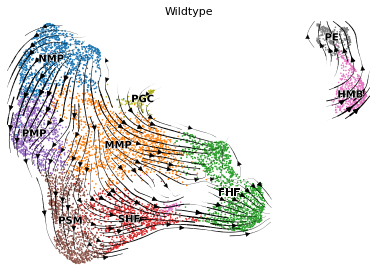

In [39]:
scv.pl.velocity_embedding_stream(flox_mesoderm, basis='umap', color = 'clust_anno', title = 'Wildtype', size = 10, alpha = 1, xlabel = 'UMAP 1', ylabel = 'UMAP 2', linewidth = 1, fontsize =11, figsize = [6.5,4.5], save = 'umap-velocity-mesoderm-flox.png')

In [40]:
flox_mesoderm.uns['neighbors']['distances'] = flox_mesoderm.obsp['distances']
flox_mesoderm.uns['neighbors']['connectivities'] = flox_mesoderm.obsp['connectivities']

scv.tl.paga(flox_mesoderm, groups='clust_anno')
df = scv.get_df(flox_mesoderm, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')


computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


,NMP,MMP,FHF,SHF,PMP,PSM,HMB,PE,PGC
NMP,0,0,0,0,0.58,0,0,0,0
MMP,0,0,0.41,0,0,0,0,0,0
FHF,0,0,0,0,0,0,0,0,0
SHF,0,0,0,0,0,0,0.16,0,0
PMP,0,0,0,0,0,0.33,0,0,0
PSM,0,0,0,0.65,0,0,0,0,0
HMB,0,0,0,0,0,0,0,0.39,0
PE,0,0,0,0,0,0,0,0,0
PGC,0.13,0.63,0,0,0,0,0,0,0


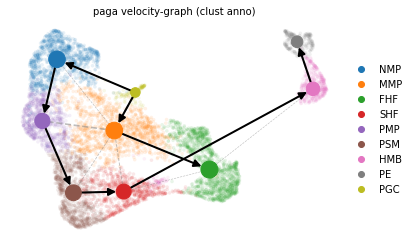

In [41]:
scv.pl.paga(flox_mesoderm, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

In [44]:
flox_mesoderm.write('/Volumes/Bud_SSD/20210621-velocyto/scvelo-mesoderm-flox.h5ad')

In [45]:
from sklearn.neighbors import NearestNeighbors
from scipy.stats import norm as normal

def quiver_autoscale(X_emb, V_emb):
    import matplotlib.pyplot as pl

    scale_factor = np.abs(X_emb).max()  # just so that it handles very large values
    fig, ax = pl.subplots()
    Q = ax.quiver(
        X_emb[:, 0] / scale_factor,
        X_emb[:, 1] / scale_factor,
        V_emb[:, 0],
        V_emb[:, 1],
        angles="xy",
        scale_units="xy",
        scale=None,
    )
    Q._init()
    fig.clf()
    pl.close(fig)
    return Q.scale / scale_factor

def compute_velocity_on_grid(
    X_emb,
    V_emb,
    density=None,
    smooth=None,
    n_neighbors=None,
    min_mass=None,
    autoscale=False,
    adjust_for_stream=True,
    cutoff_perc=None,
):
    # remove invalid cells
    idx_valid = np.isfinite(X_emb.sum(1) + V_emb.sum(1))
    X_emb = X_emb[idx_valid]
    V_emb = V_emb[idx_valid]

    # prepare grid
    n_obs, n_dim = X_emb.shape
    density = 1 if density is None else density
    smooth = 0.5 if smooth is None else smooth

    grs = []
    for dim_i in range(n_dim):
        m, M = np.min(X_emb[:, dim_i]), np.max(X_emb[:, dim_i])
        m = m - 0.01 * np.abs(M - m)
        M = M + 0.01 * np.abs(M - m)
        gr = np.linspace(m, M, int(50 * density))
        grs.append(gr)

    meshes_tuple = np.meshgrid(*grs)
    X_grid = np.vstack([i.flat for i in meshes_tuple]).T

    # estimate grid velocities
    if n_neighbors is None:
        n_neighbors = int(n_obs / 50)
    nn = NearestNeighbors(n_neighbors=n_neighbors, n_jobs=-1)
    nn.fit(X_emb)
    dists, neighs = nn.kneighbors(X_grid)

    scale = np.mean([(g[1] - g[0]) for g in grs]) * smooth
    weight = normal.pdf(x=dists, scale=scale)
    p_mass = weight.sum(1)

    V_grid = (V_emb[neighs] * weight[:, :, None]).sum(1)
    V_grid /= np.maximum(1, p_mass)[:, None]
    if min_mass is None:
        min_mass = 1

    if adjust_for_stream:
        X_grid = np.stack([np.unique(X_grid[:, 0]), np.unique(X_grid[:, 1])])
        ns = int(np.sqrt(len(V_grid[:, 0])))
        V_grid = V_grid.T.reshape(2, ns, ns)

        mass = np.sqrt((V_grid ** 2).sum(0))
        min_mass = 10 ** (min_mass - 6)  # default min_mass = 1e-5
        min_mass = np.clip(min_mass, None, np.max(mass) * 0.9)
        cutoff = mass.reshape(V_grid[0].shape) < min_mass

        if cutoff_perc is None:
            cutoff_perc = 5
        length = np.sum(np.mean(np.abs(V_emb[neighs]), axis=1), axis=1).T
        length = length.reshape(ns, ns)
        cutoff |= length < np.percentile(length, cutoff_perc)

        V_grid[0][cutoff] = np.nan
    else:
        min_mass *= np.percentile(p_mass, 99) / 100
        X_grid, V_grid = X_grid[p_mass > min_mass], V_grid[p_mass > min_mass]

        if autoscale:
            V_grid /= 3 * quiver_autoscale(X_grid, V_grid)

    return X_grid, V_grid

In [46]:
X_grid, V_grid = compute_velocity_on_grid(X_emb = flox_mesoderm.obsm['X_umap'], V_emb = flox_mesoderm.obsm['velocity_umap'])

lengths = np.sqrt((V_grid ** 2).sum(0))
linewidth = 2 * lengths / lengths[~np.isnan(lengths)].max()

In [47]:
cell_id = np.array(flox_mesoderm.obs.index)
umap_1 = np.array(flox_mesoderm.obsm['X_umap'][:,0])
umap_2 = np.array(flox_mesoderm.obsm['X_umap'][:,1])
clust_anno = np.array(flox_mesoderm.obs['clust_anno'])

In [48]:
umap_1_nmp = umap_1[clust_anno == 'NMP']
umap_2_nmp = umap_2[clust_anno == 'NMP']

umap_1_mmp = umap_1[clust_anno == 'MMP']
umap_2_mmp = umap_2[clust_anno == 'MMP']

umap_1_fhf = umap_1[clust_anno == 'FHF']
umap_2_fhf = umap_2[clust_anno == 'FHF']

umap_1_shf = umap_1[clust_anno == 'SHF']
umap_2_shf = umap_2[clust_anno == 'SHF']

umap_1_pmp = umap_1[clust_anno == 'PMP']
umap_2_pmp = umap_2[clust_anno == 'PMP']

umap_1_psm = umap_1[clust_anno == 'PSM']
umap_2_psm = umap_2[clust_anno == 'PSM']

umap_1_hmb = umap_1[clust_anno == 'HMB']
umap_2_hmb = umap_2[clust_anno == 'HMB']

umap_1_pe = umap_1[clust_anno == 'PE']
umap_2_pe = umap_2[clust_anno == 'PE']

umap_1_pgc = umap_1[clust_anno == 'PGC']
umap_2_pgc = umap_2[clust_anno == 'PGC']


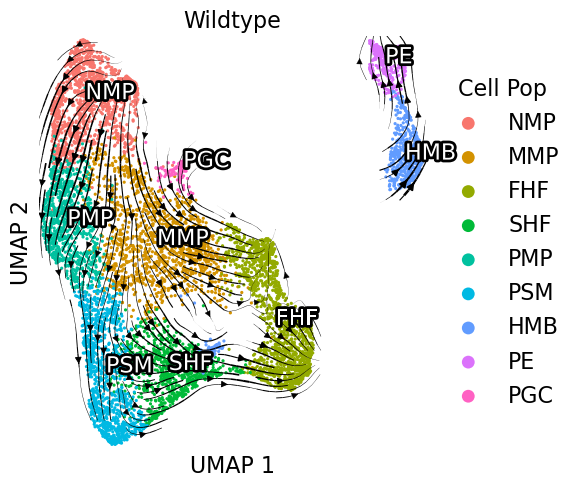

In [94]:
plt.style.use('default')

# generate scatter plot of cells; color by cluster; annotate with cluster
fig_final, ax = plt.subplots(constrained_layout=True)

ax.scatter(x = umap_1_nmp, 
           y = umap_2_nmp, 
           edgecolors = 'none', 
           s = 5.3, c = '#F8766D', label = 'NMP')

ax.scatter(x = umap_1_mmp, 
           y = umap_2_mmp, 
           edgecolors = 'none', 
           s = 5.3, c = '#D39200', label = 'MMP')

ax.scatter(x = umap_1_fhf, 
           y = umap_2_fhf, 
           edgecolors = 'none', 
           s = 5.3, c = '#93AA00', label = 'FHF')

ax.scatter(x = umap_1_shf, 
           y = umap_2_shf, 
           edgecolors = 'none', 
           s = 5.3, c = '#00BA38', label = 'SHF')

ax.scatter(x = umap_1_pmp, 
           y = umap_2_pmp, 
           edgecolors = 'none', 
           s = 5.3, c = '#00C19F', label = 'PMP')

ax.scatter(x = umap_1_psm, 
           y = umap_2_psm, 
           edgecolors = 'none', 
           s = 5.3, c = '#00B9E3', label = 'PSM')

ax.scatter(x = umap_1_hmb, 
           y = umap_2_hmb, 
           edgecolors = 'none', 
           s = 5.3, c = '#619CFF', label = 'HMB')

ax.scatter(x = umap_1_pe, 
           y = umap_2_pe, 
           edgecolors = 'none', 
           s = 5.3, c = '#DB72FB', label = 'PE')

ax.scatter(x = umap_1_pgc, 
           y = umap_2_pgc, 
           edgecolors = 'none', 
           s = 5.3, c = '#FF61C3', label = 'PGC')

ax.streamplot(x = X_grid[0], y = X_grid[1], u = V_grid[0], v = V_grid[1], density = 2, color = 'black', linewidth = linewidth) 

ax.annotate('NMP', xy = [np.median(umap_1_nmp), np.median(umap_2_nmp)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)
ax.annotate('MMP', xy = [np.median(umap_1_mmp), np.median(umap_2_mmp)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)
ax.annotate('FHF', xy = [np.median(umap_1_fhf), np.median(umap_2_fhf)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)
ax.annotate('SHF', xy = [np.median(umap_1_shf), np.median(umap_2_shf)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)
ax.annotate('PMP', xy = [np.median(umap_1_pmp), np.median(umap_2_pmp)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)
ax.annotate('PSM', xy = [np.median(umap_1_psm), np.median(umap_2_psm)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)
ax.annotate('HMB', xy = [np.median(umap_1_hmb), np.median(umap_2_hmb)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)
ax.annotate('PE', xy = [np.median(umap_1_pe), np.median(umap_2_pe)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)
ax.annotate('PGC', xy = [np.median(umap_1_pgc), np.median(umap_2_pgc)], color = 'white', path_effects=[pe.withStroke(linewidth=4, foreground="black")], size = 16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_xlabel('UMAP 1', size = 16)
ax.set_ylabel('UMAP 2', size = 16)
ax.set_title('Wildtype', size = 16)
ax.legend(bbox_to_anchor=(1, 0.5), loc = 'center left', frameon=False, title = "Cell Pop", title_fontsize = 16, markerscale = 4, fontsize = 16)

fig_final.set_size_inches(5.67, 4.76)


In [95]:
fig_final.savefig("/Volumes/Bud_SSD/20210621-velocyto/umap-velocity-mesoderm-flox.png", bbox_inches = 'tight', dpi = 300)